
## Introduction

You need to ensure that the TrAItor cannot outsmart the model. You need to determine the areas where the model needs improvement. Can you make the model detect multiple items?

## Objective

Make the model detect specific items.

**NOTE** Rate Limit requirements.

Please limit endpoint requests to 1 request per second per user. Any excessive requests may result in disqualification from the competition.

## Setup

In order to interact with the challenge, you will need your API Key.

You can find this key in the Crucible platform in this challenge.

[https://crucible.dreadnode.io/challenges/autopilot3](https://crucible.dreadnode.io/challenges/autopilot3)

In [4]:
CRUCIBLE_API_KEY = "YOUR_API_KEY"  # Replace with your actual API key
with open('../api.txt', 'r') as f:
    CRUCIBLE_API_KEY = f.readline()

### Install Required Packages

Install the required packages.


In [ ]:
%pip install requests

### Set Notebook Variables

Set the variables used throughout the notebook


In [5]:
CHALLENGE = "autopilot3"
CRUCIBLE_URL = "https://crucible.dreadnode.io"
CHALLENGE_URL = "https://autopilot3.crucible.dreadnode.io"
ARTIFACT_FILES = ['road.jpg']

### Download Data

In [ ]:
import requests

for artifact in ARTIFACT_FILES:
    url = f"{CRUCIBLE_URL}/api/artifacts/{CHALLENGE}/{artifact}"
    headers = {"X-API-Key": CRUCIBLE_API_KEY}
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        with open(artifact, "wb") as file:
            file.write(response.content)
        print(f"{artifact} was successfully downloaded")
    else:
        print(f"Failed to download {artifact}")

## Supplemental Materials

Use these materials for help solving the challenge.

### Helper Functions

In [6]:
import base64
import os
from io import BytesIO
import requests

from PIL import Image


def image_to_base64(img: Image.Image) -> str:
    buffered = BytesIO()
    img.save(buffered, format="JPEG")
    img_bytes = buffered.getvalue()
    img_base64 = base64.b64encode(img_bytes).decode("utf-8")
    return img_base64

/Users/ytsun/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Submit Your Findings

Submit findings placeholder

In [ ]:
import torch
import torch.nn.functional as F

def fgsm_attack(image, epsilon, data_grad):
    # Get the sign of the gradients
    sign_data_grad = data_grad.sign()
    # Create the perturbed image
    perturbed_image = image + epsilon * sign_data_grad
    # Clip the image to maintain [0,1] range
    perturbed_image = torch.clamp(perturbed_image, 0, 1)
    return perturbed_image

# Assuming `image` is your input image tensor and `model` is your neural network
image.requires_grad = True
output = model(image)
label = torch.argmax(output, dim=1)  # original label
loss = F.nll_loss(output, label)
model.zero_grad()
loss.backward()

# Collect the gradients of the image
data_grad = image.grad.data
epsilon = 0.1  # Set an epsilon value (amount of perturbation)
perturbed_image = fgsm_attack(image, epsilon, data_grad)


In [ ]:
# stop sign: 11
# car: 2

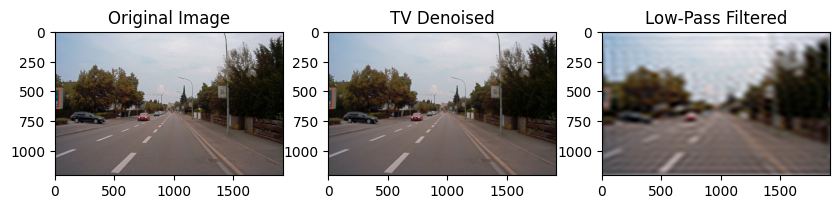

True

In [91]:
import numpy as np
import cv2
from skimage.restoration import denoise_tv_chambolle
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('road.jpg', cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB format
image = cv2.resize(image, (1920, 1208))         # Ensure it has the target resolution

# Step 1: Total Variation Denoising (process each channel separately)
tv_denoised = np.zeros_like(image, dtype=np.float32)
for i in range(3):  # Apply TV denoising to each channel
    tv_denoised[:, :, i] = denoise_tv_chambolle(image[:, :, i] / 255.0, weight=0.1) * 255.0

# Step 2: Fourier Transform Low-pass Filtering
def low_pass_filter(image, radius=20):
    # Convert image to frequency domain
    dft = np.fft.fft2(image, axes=(0, 1))
    dft_shift = np.fft.fftshift(dft)

    # Generate low-pass filter mask
    rows, cols = image.shape[:2]
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols, 3), np.uint8)
    for i in range(3):  # Apply mask to each channel
        mask[crow-radius:crow+radius, ccol-radius:ccol+radius, i] = 1

    # Apply the mask and inverse DFT
    fshift = dft_shift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift, axes=(0, 1))

    # Normalize the result to be within [0, 255]
    img_back = np.abs(img_back)
    img_back = (img_back - img_back.min()) / (img_back.max() - img_back.min()) * 255
    return img_back.astype(np.uint8)

# Apply the low-pass filter to the TV-denoised image
filtered_image = low_pass_filter(tv_denoised)

# Display the result
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1), plt.imshow(image), plt.title('Original Image')
plt.subplot(1, 3, 2), plt.imshow(tv_denoised.astype(np.uint8)), plt.title('TV Denoised')
plt.subplot(1, 3, 3), plt.imshow(filtered_image), plt.title('Low-Pass Filtered')
plt.show()

# Save the final result if needed
cv2.imwrite('denoised_image.jpg', cv2.cvtColor(tv_denoised, cv2.COLOR_RGB2BGR))


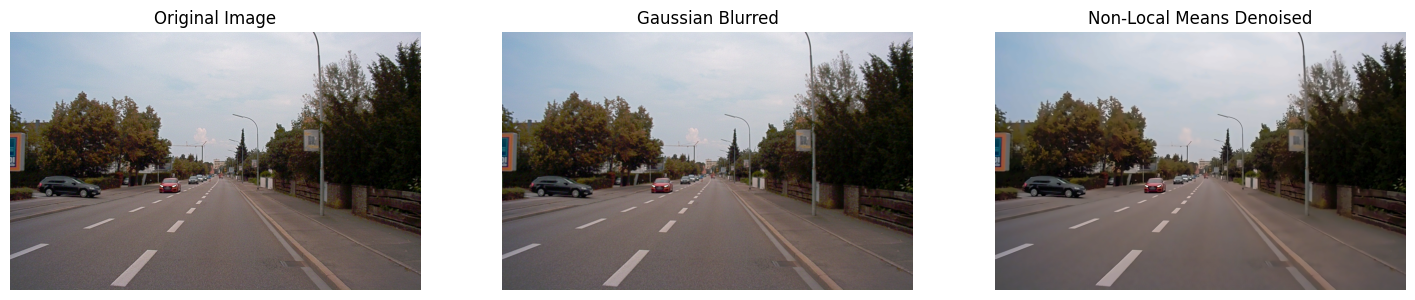

In [97]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = 'road.jpg'  # Replace with the path to your image
image_rgb = Image.open(image_path).convert('RGB')

# Convert the image to a numpy array for processing with OpenCV
image_cv = np.array(image_rgb)

# Apply Gaussian Blur
gaussian_denoised = cv2.GaussianBlur(image_cv, (5, 5), 0)

# Apply Non-Local Means Denoising
non_local_means_denoised = cv2.fastNlMeansDenoisingColored(image_cv, None, 10, 10, 7, 21)

# Display the original and denoised images for comparison
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].imshow(image_cv)
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(gaussian_denoised)
axs[1].set_title("Gaussian Blurred")
axs[1].axis('off')

axs[2].imshow(non_local_means_denoised)
axs[2].set_title("Non-Local Means Denoised")
axs[2].axis('off')

plt.show()

# Optional: Save the denoised images if needed
gaussian_denoised_image = Image.fromarray(gaussian_denoised)
non_local_means_denoised_image = Image.fromarray(non_local_means_denoised)
gaussian_denoised_image.save('gaussian_denoised.jpg')
non_local_means_denoised_image.save('non_local_means_denoised.jpg')


In [89]:
def query(image_path):
    img = Image.open(image_path)
    img_base64 = image_to_base64(img)
    response = requests.post(
        f"{CHALLENGE_URL}/score",
        headers={"X-API-Key": CRUCIBLE_API_KEY},
        json={"data": img_base64},
    )
    return response.json()

In [113]:
img = '14.jpg'
response = query(img)
print(response)

for i in response['distance']:
    print(i)

{'error': 'Too few objects detected'}


KeyError: 'distance'

In [82]:
response['distance'] = [response['distance'][0], response['distance'][6]]

1208 1920


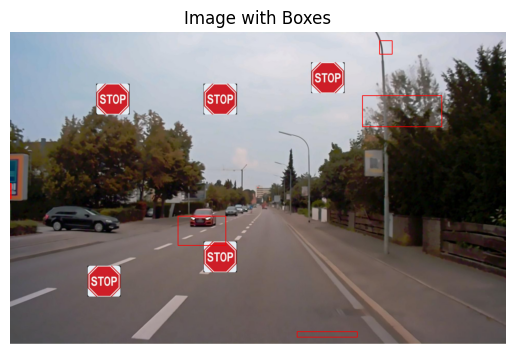

In [103]:
import cv2
import matplotlib.pyplot as plt

# Read the image
def show(origin_x, origin_y):
    # Load the image
    image = cv2.imread(img)

    # Check if the image was loaded successfully
    if image is None:
        print("Error: Image not found or unable to load.")
        return

    # Convert BGR (OpenCV default) to RGB for displaying with matplotlib
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Get image dimensions
    image_height, image_width, _ = image.shape
    print(image_height, image_width)

    # Define the origin position (adjustable)
    # For example, to set the origin at the center of the image:
    # origin_x = image_width // 2
    # origin_y = image_height // 2

    coordinates = response['distance']

    for idx, d in enumerate(coordinates):
        # Adjust coordinates based on the origin
        # x1 = int(d['x1'] // 2 + origin_x)
        # y1 = int(d['y1'] // 2 + origin_y) 
        # x2 = int(d['x2'] // 2+ origin_x) 
        # y2 = int(d['y2'] // 2+ origin_y) 

        x1 = int(d['x1'] + origin_x)
        y1 = int(d['y1'] + origin_y) 
        x2 = int(d['x2'] + origin_x) 
        y2 = int(d['y2'] + origin_y) 

        # Swap x1 and x2 if x1 > x2
        if x1 > x2:
            x1, x2 = x2, x1

        # Swap y1 and y2 if y1 > y2
        if y1 > y2:
            y1, y2 = y2, y1

        x1 = max(0, min(x1, image_width - 1))
        x2 = max(0, min(x2, image_width - 1))
        y1 = max(0, min(y1, image_height - 1))
        y2 = max(0, min(y2, image_height - 1))

        # Clip the coordinates to be within the image boundaries
        if x1 < 0 or x2 < 0 or y1 < 0 or y2 < 0:
            print(f"Box {idx} is out of bounds, skipping.")
            continue
        if x1 >= image_width or x2 >= image_width or y1 >= image_height or y2 >= image_height:
            print(f"Box {idx} is out of bounds, skipping.")
            continue

        # Draw the rectangle on the original image
        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Red box with thickness of 2

    # Display the image with all rectangles
    plt.imshow(image)
    plt.title("Image with Boxes")
    plt.axis('off')
    plt.show()

# show(0,0)
show(960, 604)
# show(-1920, -1208)

1208 1920


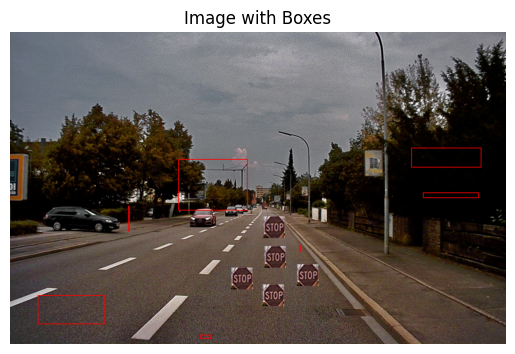

In [35]:
show(960, 604)

1208 1920


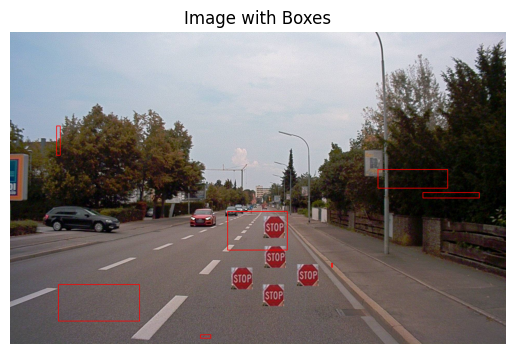

In [37]:
show(960, 604)

In [37]:
import cv2
import matplotlib.pyplot as plt

# Read the image
def show(origin_x, origin_y):
    image = cv2.imread(img) 

    # Check if the image was loaded successfully
    if image is None:
        print("Error: Image not found or unable to load.")
        exit()

    # Convert BGR (OpenCV default) to RGB for displaying with matplotlib
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Get image dimensions
    image_height, image_width, _ = image.shape

    # Define the origin position (adjustable)
    # For example, to set the origin at the center of the image:
    image_height, image_width = 1208, 1920
    origin_x = image_width // 2
    origin_y = image_height // 2
    # origin_x = 0
    # origin_y = 0

    coordinates = response['distance']

    for idx, d in enumerate(coordinates):
        # Adjust coordinates based on the origin
        x1 = int(d['x1'] + origin_x) // 2
        y1 = int(d['y1'] + origin_y) // 2
        x2 = int(d['x2'] + origin_x) // 2
        y2 = int(d['y2'] + origin_y) // 2

        # Swap x1 and x2 if x1 > x2
        if x1 > x2:
            x1, x2 = x2, x1

        # Swap y1 and y2 if y1 > y2
        if y1 > y2:
            y1, y2 = y2, y1

        # Clip the coordinates to be within the image boundaries
        # x1 = max(0, min(x1, image_width - 1))
        # x2 = max(0, min(x2, image_width - 1))
        # y1 = max(0, min(y1, image_height - 1))
        # y2 = max(0, min(y2, image_height - 1))

        if x1 < 0 or x2 < 0 or y1 < 0 or y2 < 0:
            print(f"Sub-image {idx} is out of bounds, skipping.")
            continue
        if x1 >= image_width or x2 >= image_width or y1 >= image_height or y2 >= image_height:
            print(f"Sub-image {idx} is out of bounds, skipping.")
            continue


        # Check if the coordinates are valid (non-zero area)
        if x2 - x1 > 0 and y2 - y1 > 0:
            # Extract the sub-image
            sub_image = image[y1:y2, x1:x2]

            # Display the sub-image
            plt.figure()
            plt.imshow(sub_image)
            plt.title(f"Sub-image {idx}")
            plt.axis('off')
            plt.show()
        else:
            print(f"Sub-image {idx} has zero area or invalid coordinates, skipping.")



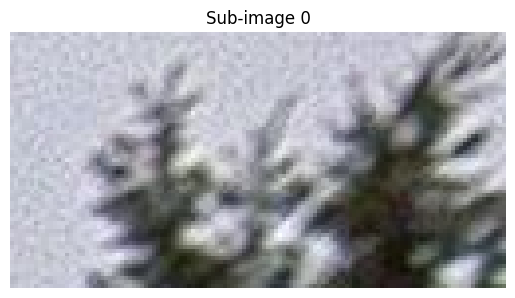

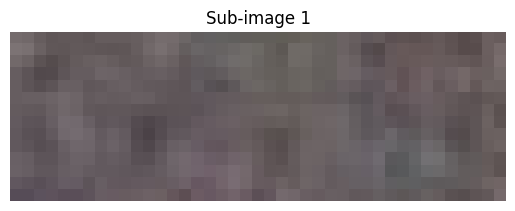

Sub-image 2 is out of bounds, skipping.
Sub-image 3 has zero area or invalid coordinates, skipping.


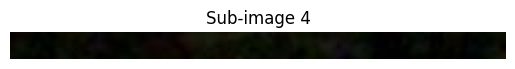

Sub-image 5 is out of bounds, skipping.


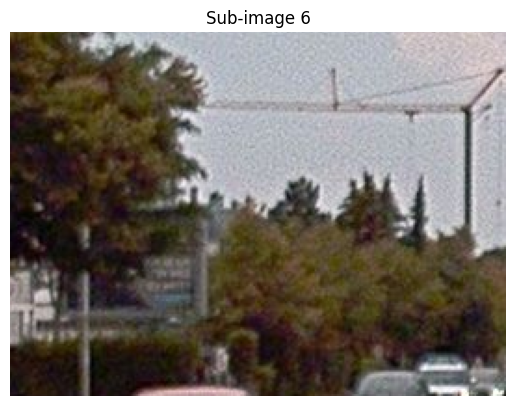

In [38]:
show(960, 604)

In [ ]:
for i in range(0, 1920, 50):
    for j in range(0, 1208, 50):
        print(i, j)
        show(i, j)

## Submit Your Flag

When you find the answer, you will get a flag back. It will look something like `gAAAAA ...`.
You can submit it using the code below, or, on the challenge page.

In [ ]:
import requests


def submit_flag(flag):
    url = f"{CRUCIBLE_URL}/api/challenges/{CHALLENGE}/submit-flag"
    headers = {"X-API-Key": CRUCIBLE_API_KEY}
    payload = {"challenge": CHALLENGE, "flag": flag}
    response = requests.post(url, headers=headers, json=payload)
    if response.status_code == 200:
        if response.json().get("correct") is True:
            print("The flag was correct. Congrats!")
        else:
            print("The flag was incorrect. Keep trying!")
    else:
        print("There was an error submitting your flag")
        print(response.text)


FLAG = "gAAAAA..."  # Replace with the flag once you find it
submit_flag(FLAG)